In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Prep

In [2]:
df = pd.read_csv("auto-mpg.data-original",delim_whitespace=True,names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
#try to complete the column with regression later?
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [4]:
df1 = df[~df.isna().any(axis=1)]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [5]:
columns = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
X = df1[columns]
y = df1[["mpg"]]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


# Simple Regression Tree

In [6]:
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [8]:
reg = DecisionTreeRegressor(max_depth= None,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print(mean_squared_error(y_pred_test,y_test))
print(r2_score(y_pred_test,y_test))

print(mean_squared_error(y_pred_train,y_train))
print(r2_score(y_pred_train,y_train))

10.046153846153848
0.8285903899825066
0.0
1.0


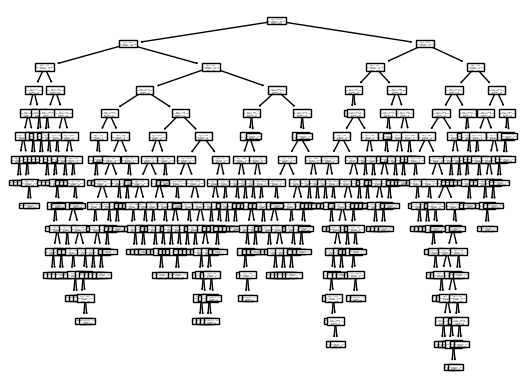

In [9]:
tree.plot_tree(reg);
plt.show()

# Optimizing parameters
## max depth

In [10]:
cross_val_score(reg, X, y, scoring='r2',cv=7,n_jobs=3)

array([ 0.75808204,  0.5646706 ,  0.82597369,  0.73453899,  0.41195586,
        0.61516413, -0.16016282])

In [11]:
depths = range(1,17)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


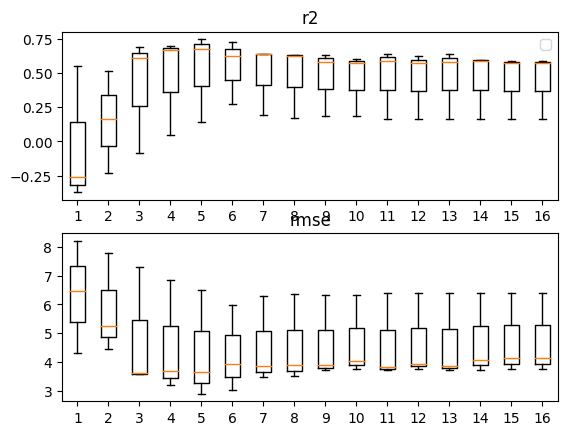

In [12]:
rmse = []
r2 = []
for dep in depths:
    reg = DecisionTreeRegressor(max_depth= dep,random_state=42)
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=3,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend()

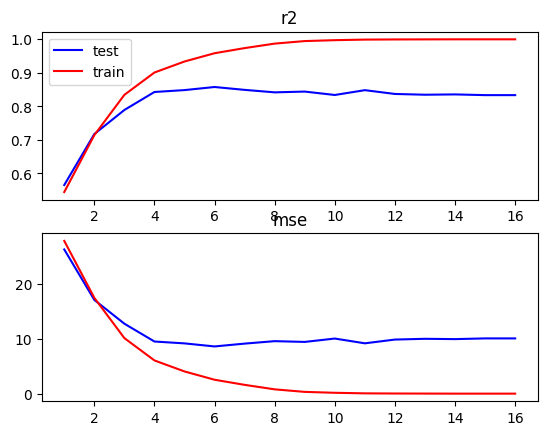

In [13]:
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []


for dep in depths:
    reg = DecisionTreeRegressor(max_depth= dep,random_state=42)
    reg.fit(X_train,y_train)
    
    y_test_pred = reg.predict(X_test)
    y_train_pred= reg.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"depth":depths})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["depth"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["depth"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["depth"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["depth"],results["train_mse"],label="train",color='red');
ax[0].legend()

In [14]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


mse test: 12.717591150807637
r2 test: 0.7675811777410455
mse train: 10.095273895889878
r2 train: 0.8015371015843978


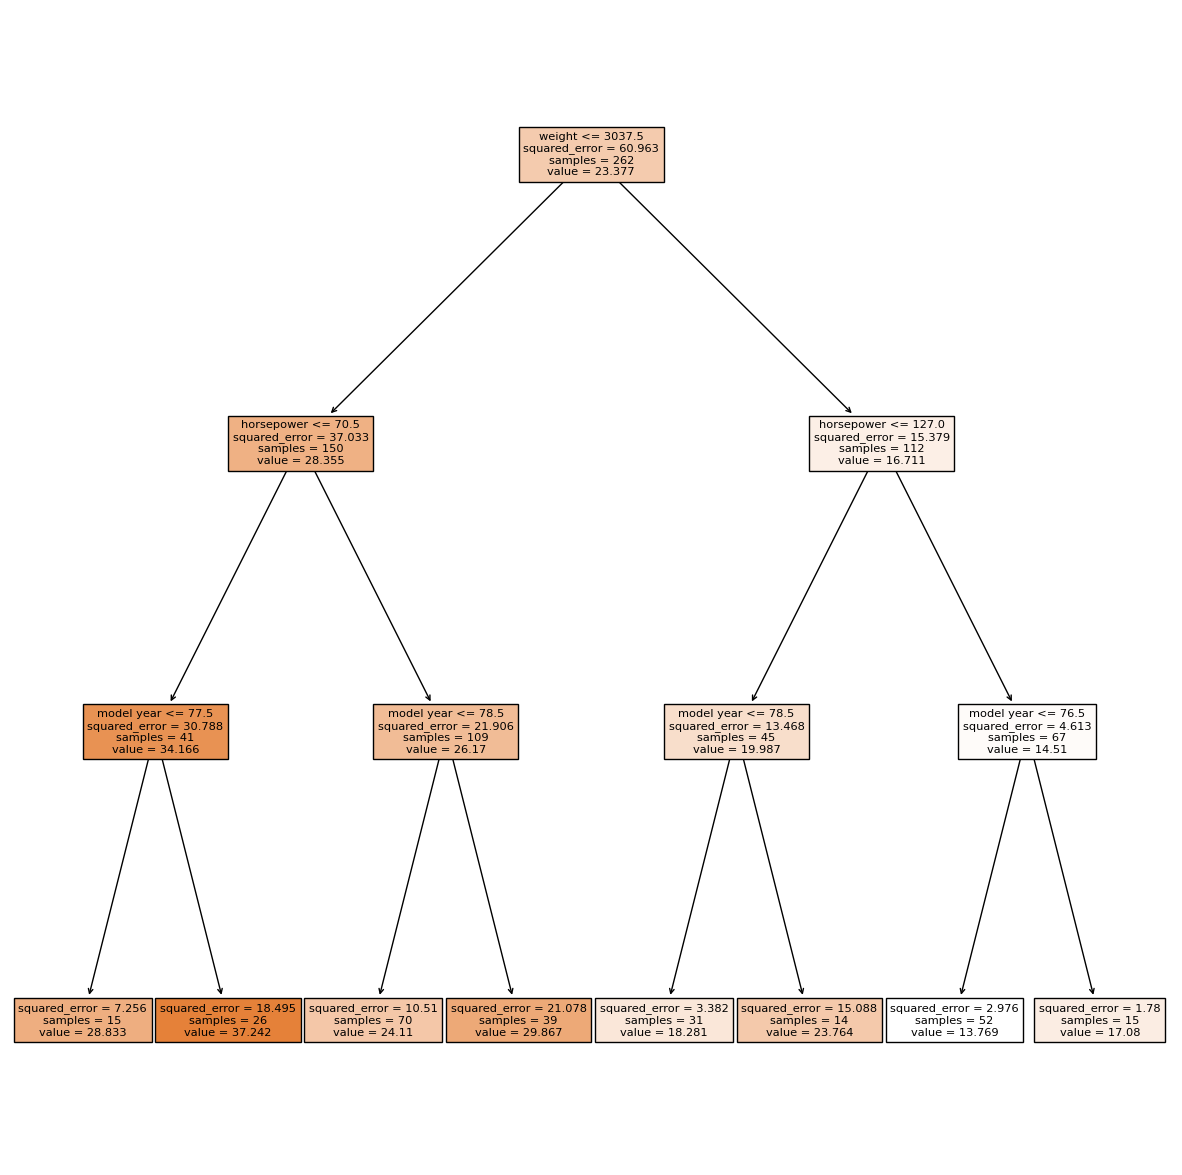

In [15]:
reg = DecisionTreeRegressor(max_depth= 3,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(15, 15)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns)
plt.show()

mse test: 9.480280492705853
r2 test: 0.8313667648139613
mse train: 6.03766700369417
r2 train: 0.8900741725325371


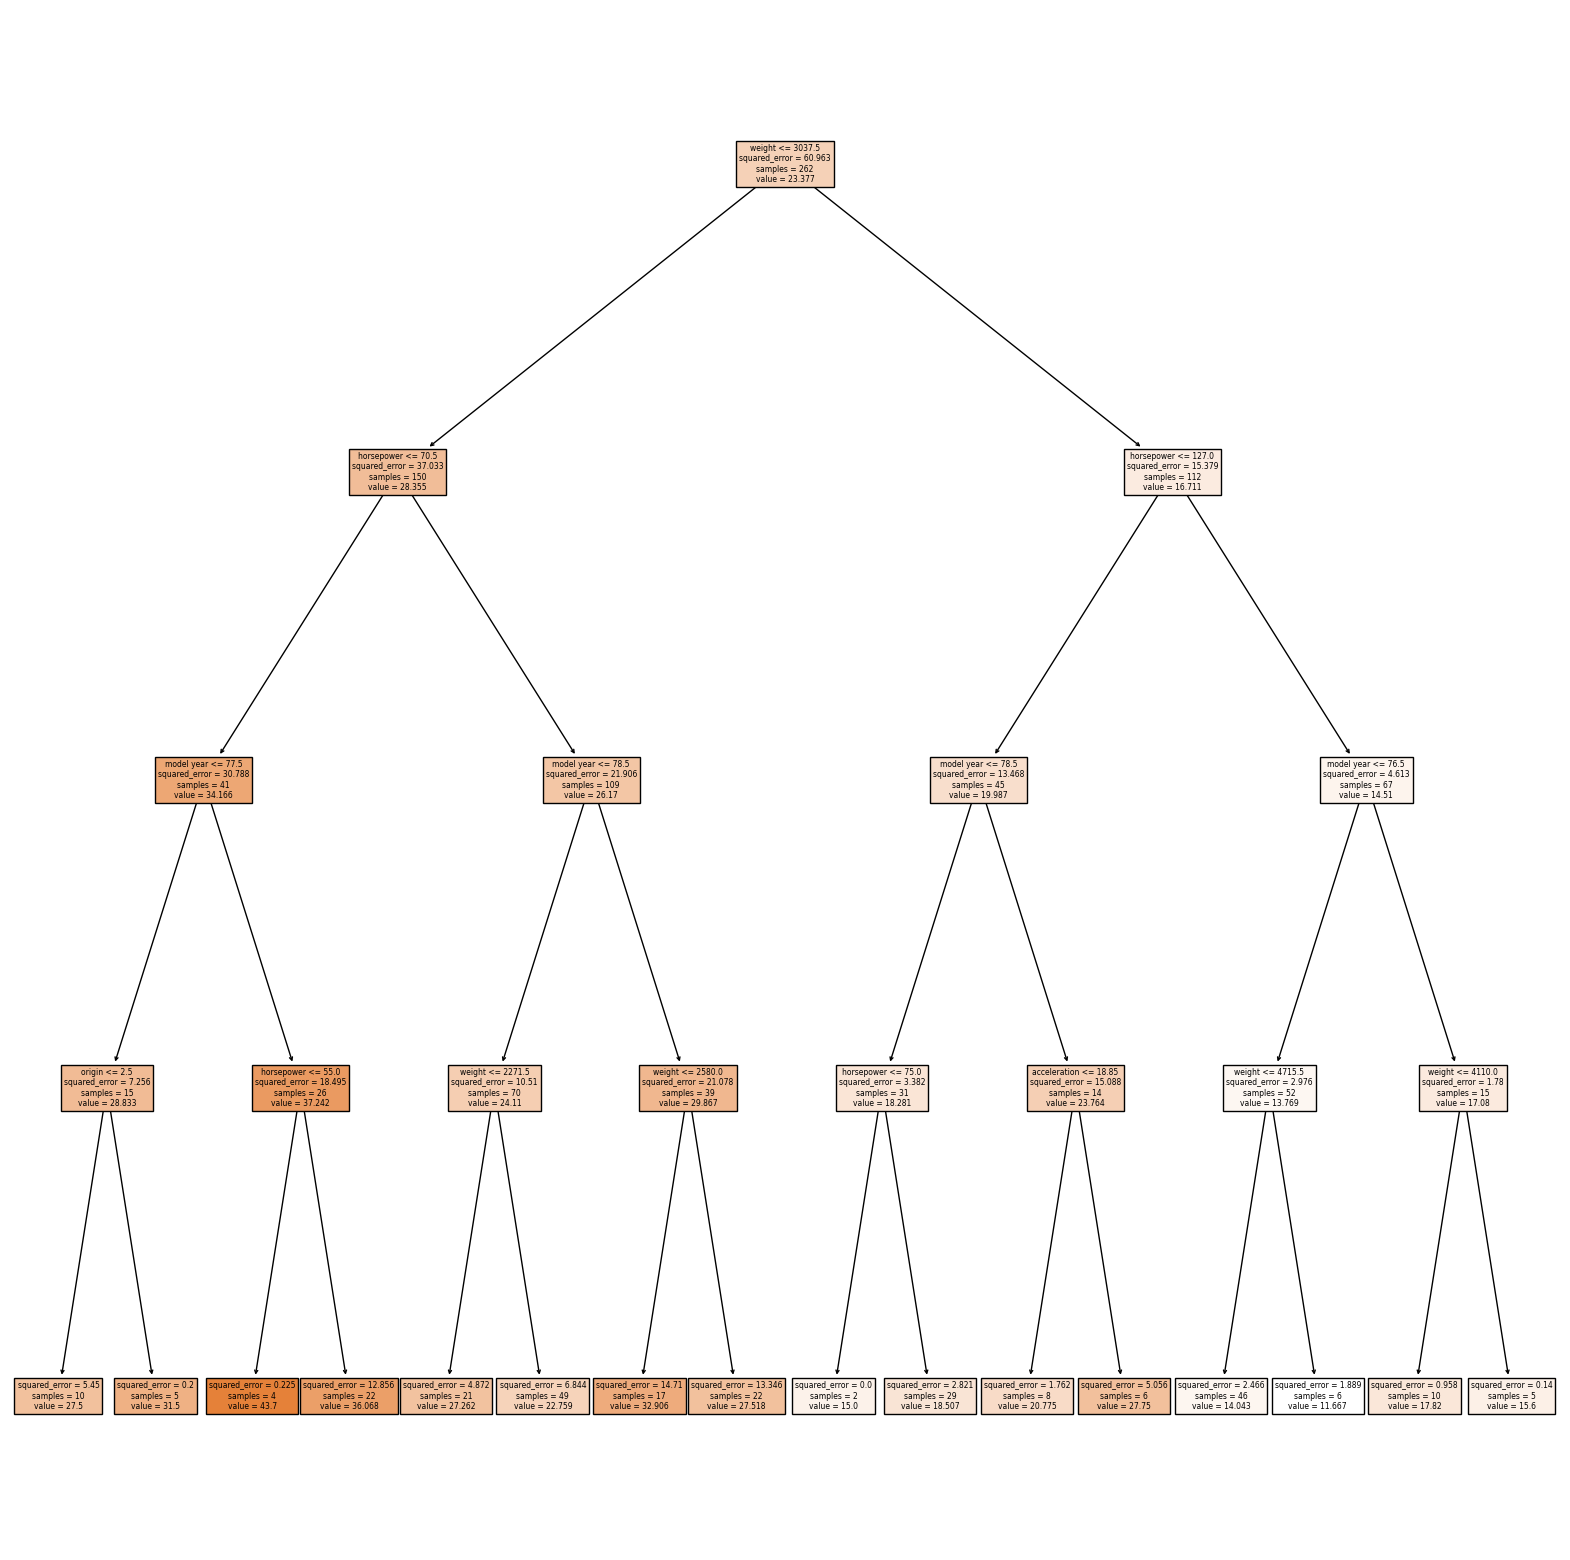

In [16]:
reg = DecisionTreeRegressor(max_depth= 4,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(20, 20)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


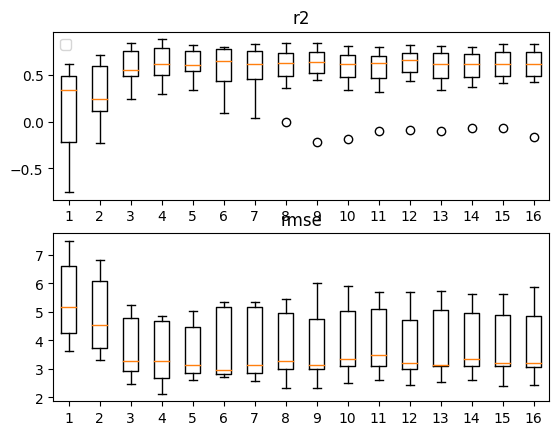

In [17]:
rmse = []
r2 = []
for dep in depths:
    reg = DecisionTreeRegressor(max_depth= dep,random_state=42,splitter='best')
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend()

## splitter

In [18]:
reg = DecisionTreeRegressor(max_depth= 6,random_state=42,splitter='random')
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
#plt.figure(figsize=(15, 15)) # Resize figure
#tree.plot_tree(reg, filled=True,feature_names=columns)
#plt.show()

mse test: 8.61189259939548
r2 test: 0.8520591804429427
mse train: 6.1901789735586945
r2 train: 0.8869836204061077


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


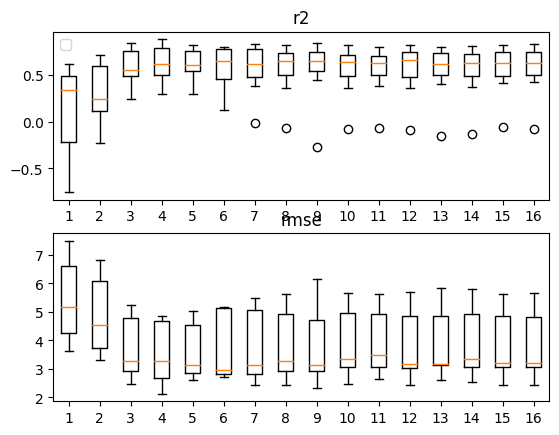

In [19]:
rmse = []
r2 = []
for dep in depths:
    reg = DecisionTreeRegressor(criterion='friedman_mse',max_depth= dep,random_state=42,splitter='best')
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend()

# criterion

mse test: 8.648519049603502
r2 test: 0.840855818701556
mse train: 6.03766700369417
r2 train: 0.8900741725325371


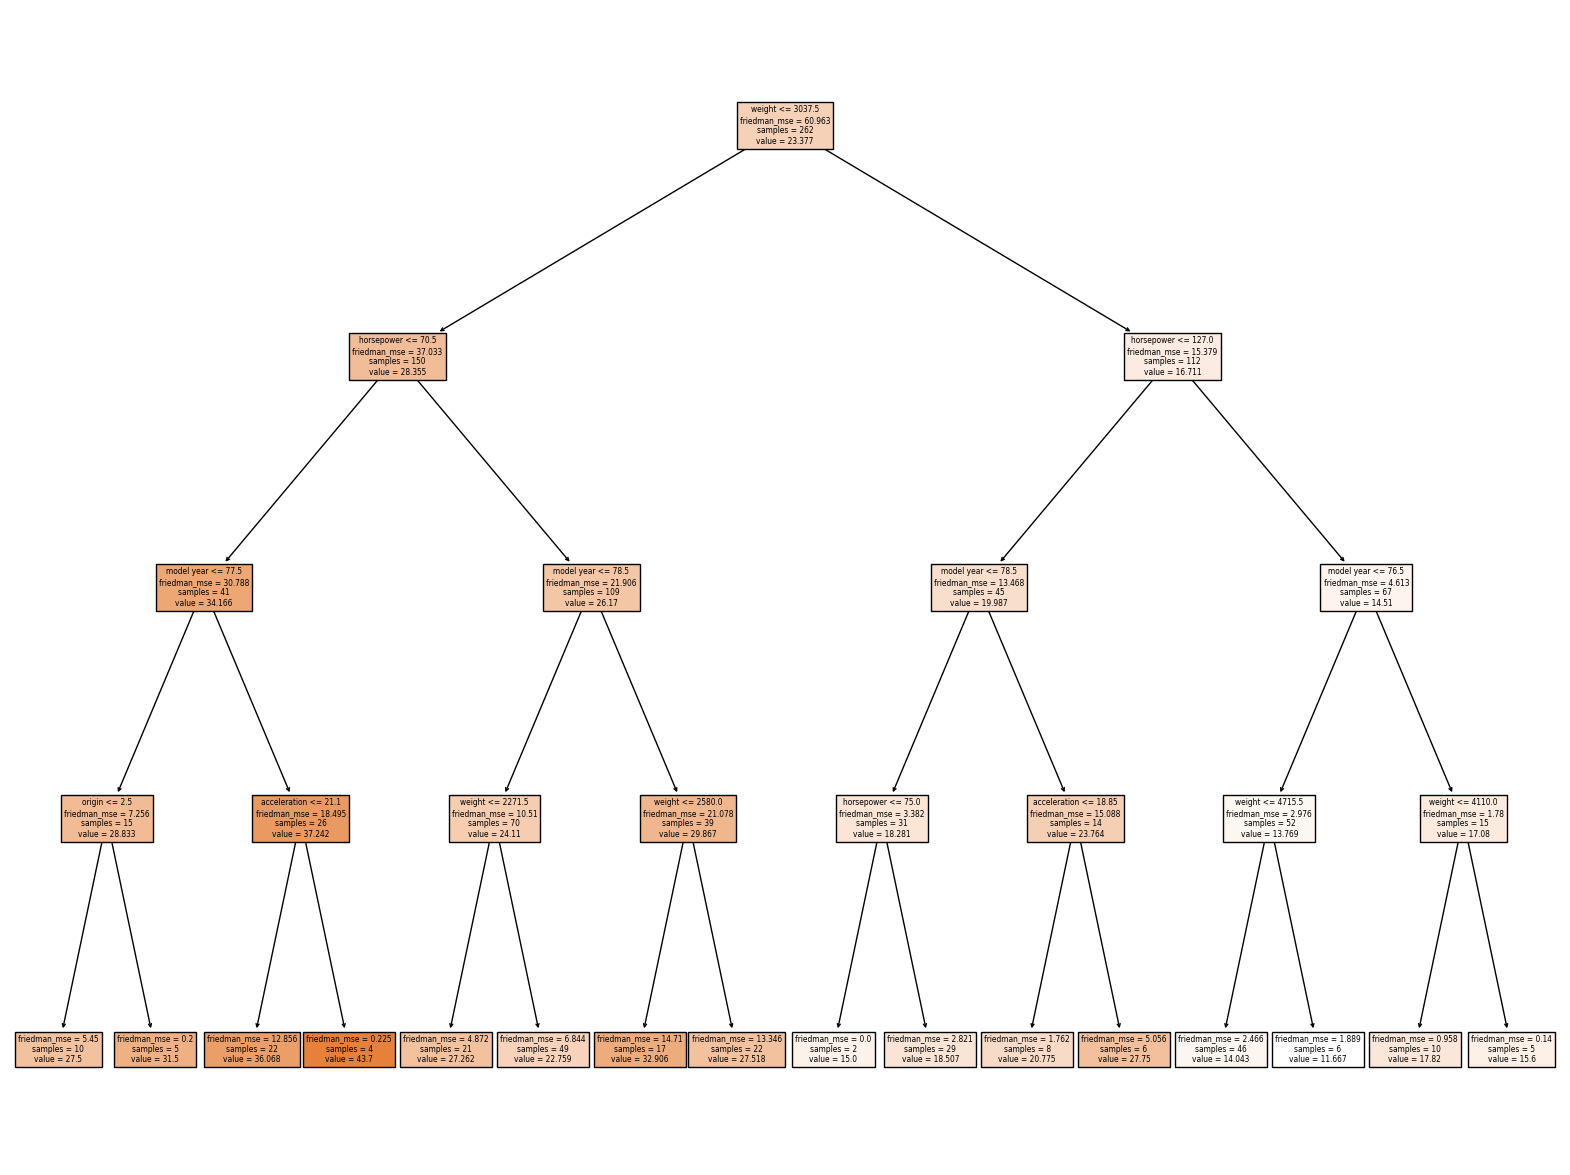

In [20]:
reg = DecisionTreeRegressor(criterion='friedman_mse',max_depth= 4,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(20, 15)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


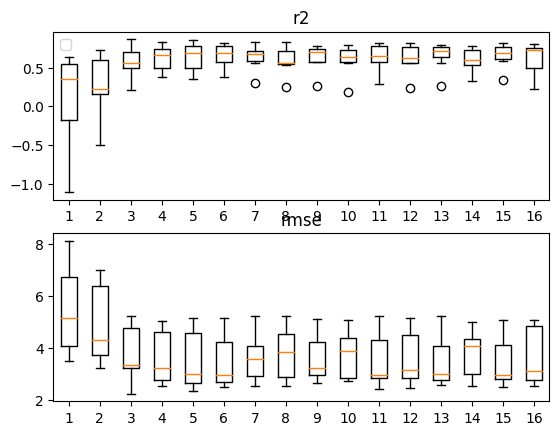

In [21]:
rmse = []
r2 = []
for dep in depths:
    reg = DecisionTreeRegressor(criterion='absolute_error',max_depth= dep,random_state=42,splitter='best')
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend()

mse test: 9.495423076923077
r2 test: 0.8167428638100838
mse train: 8.212347328244274
r2 train: 0.8475482887925404


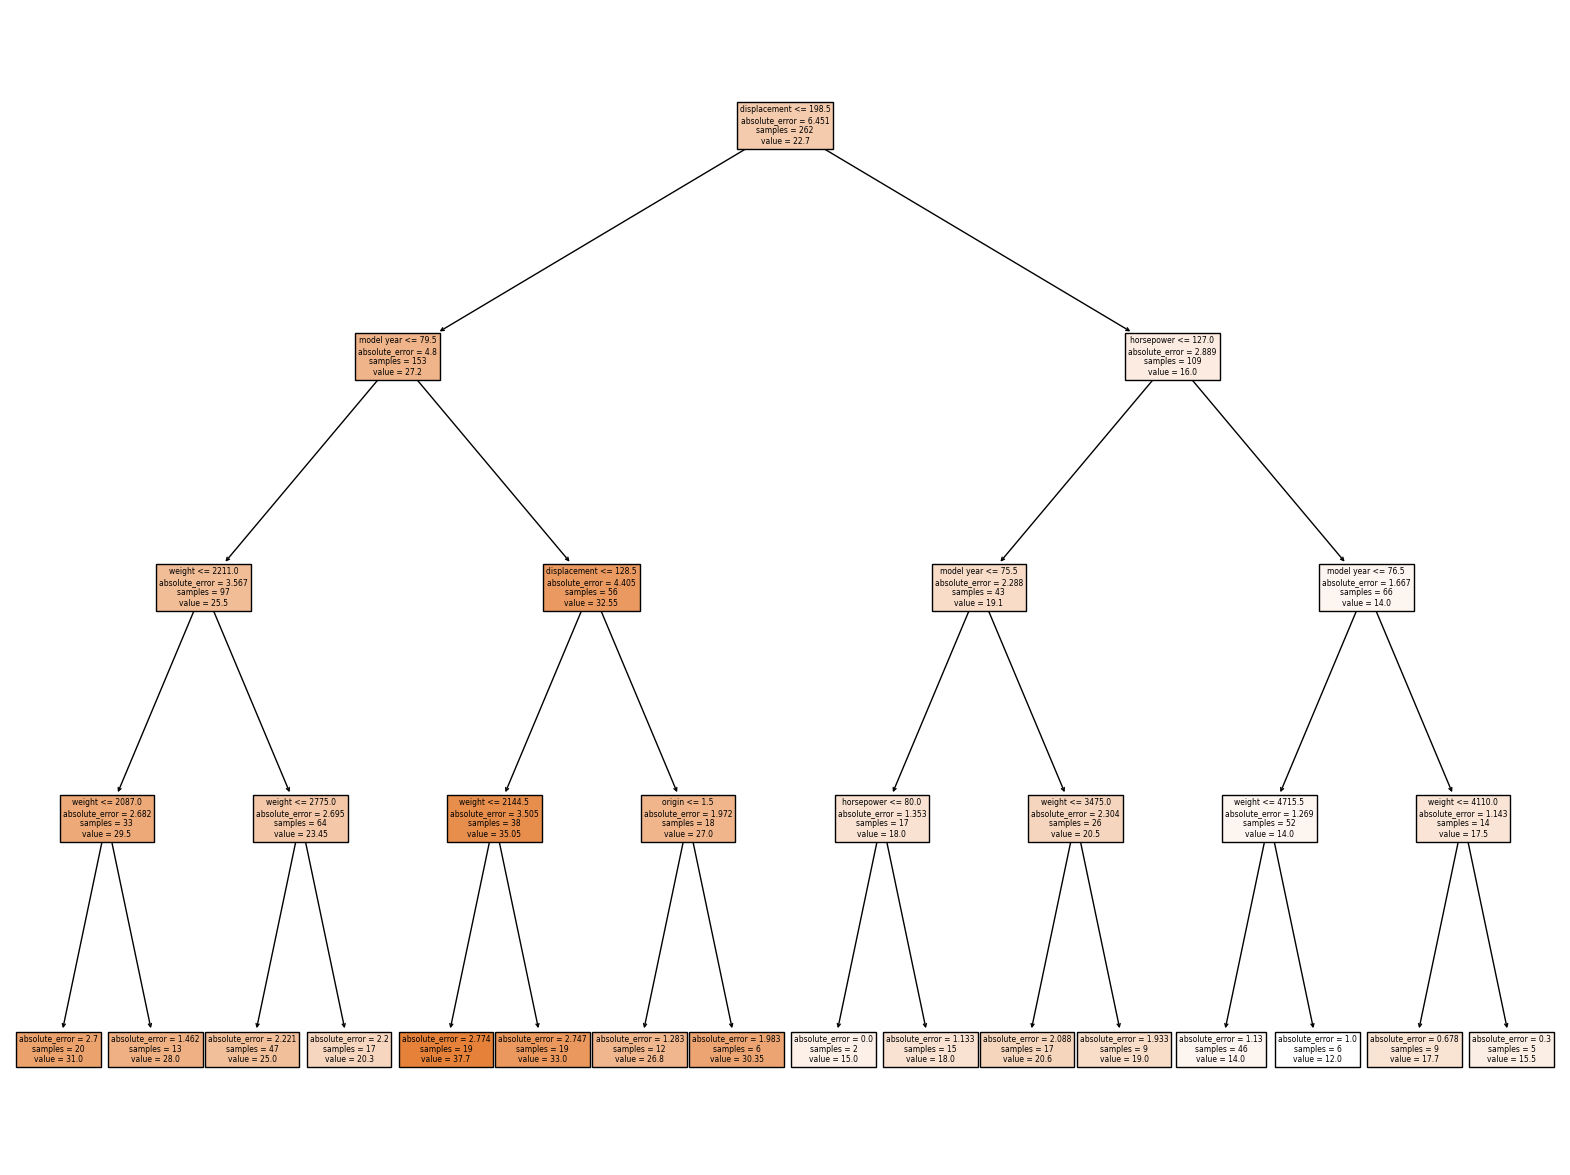

In [22]:
reg = DecisionTreeRegressor(criterion='absolute_error',max_depth= 4,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(20, 15)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


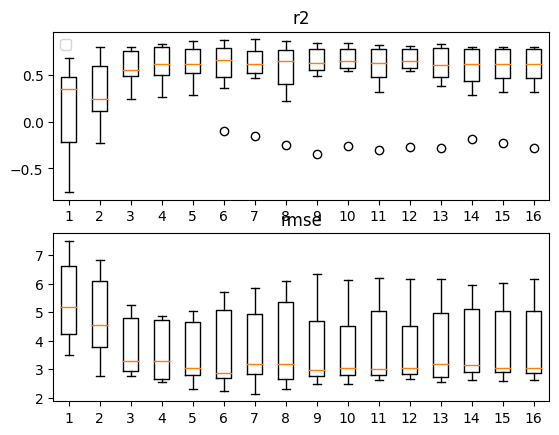

In [23]:
rmse = []
r2 = []
for dep in depths:
    reg = DecisionTreeRegressor(criterion='poisson',max_depth= dep,random_state=42,splitter='best')
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend()

mse test: 9.480280492705853
r2 test: 0.8313667648139613
mse train: 6.03766700369417
r2 train: 0.8900741725325371


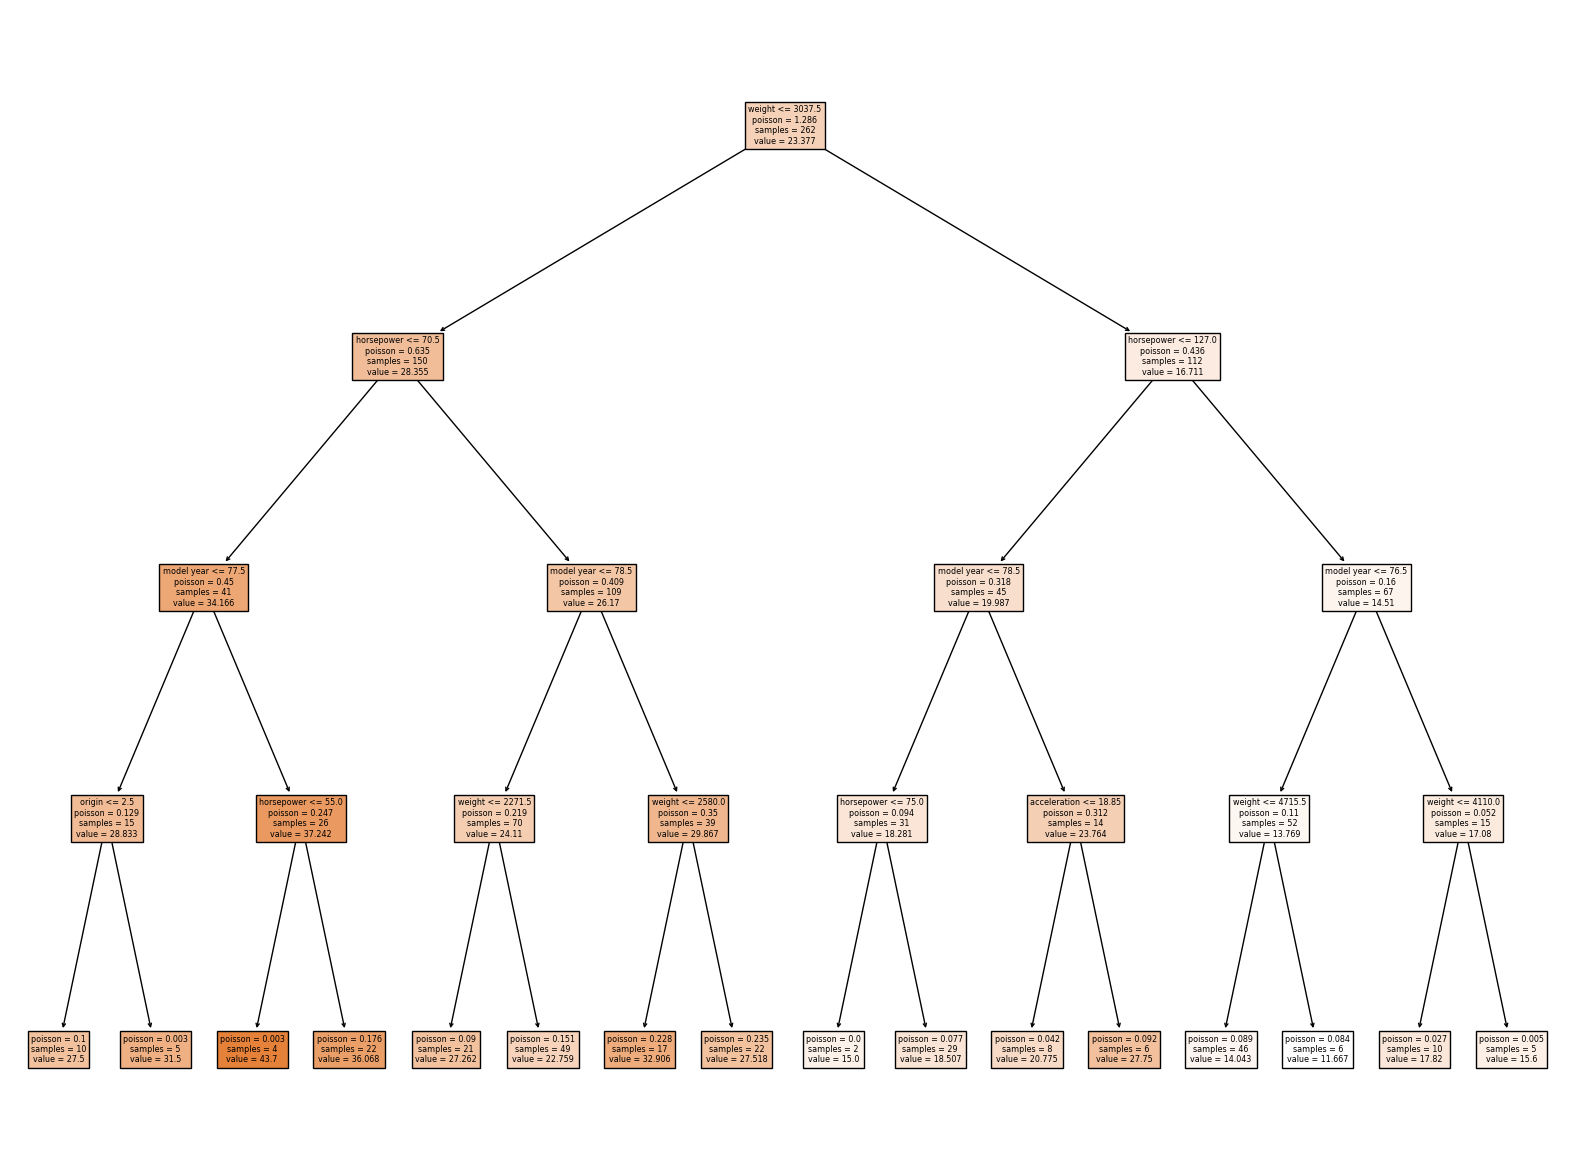

In [24]:
reg = DecisionTreeRegressor(criterion='poisson',max_depth= 4,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(20, 15)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns)
plt.show()

### Proximas ideias

- bootstrap
- boosting(adaboost,xgboost,varias regressoes lineares
- pca para achar subset e partial least squares
- dummy na origin

# Trying PCA as feature selection

In [25]:
from sklearn.decomposition import PCA

In [26]:
columns = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
X_0 = df1[columns]
y = df1[["mpg"]]
X_0

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [27]:
pca=PCA(n_components=4,random_state=42)
X = pca.fit_transform(X_0)
columns_pca = pca.get_feature_names_out(columns)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


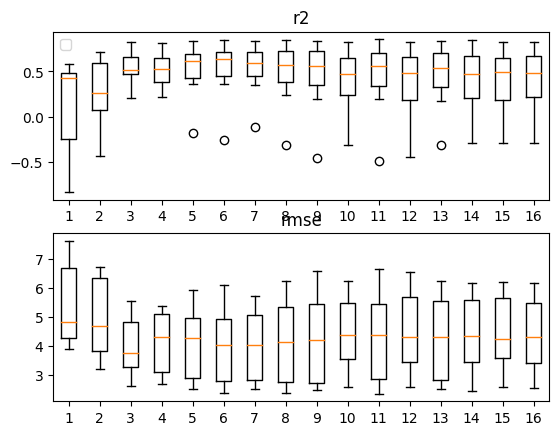

In [28]:
rmse = []
r2 = []
for dep in depths:
    reg = DecisionTreeRegressor(criterion='poisson',max_depth= dep,random_state=42,splitter='best')
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend();

mse test: 11.773671066106902
r2 test: 0.7874802860154408
mse train: 11.238719151910129
r2 train: 0.7739773632920475


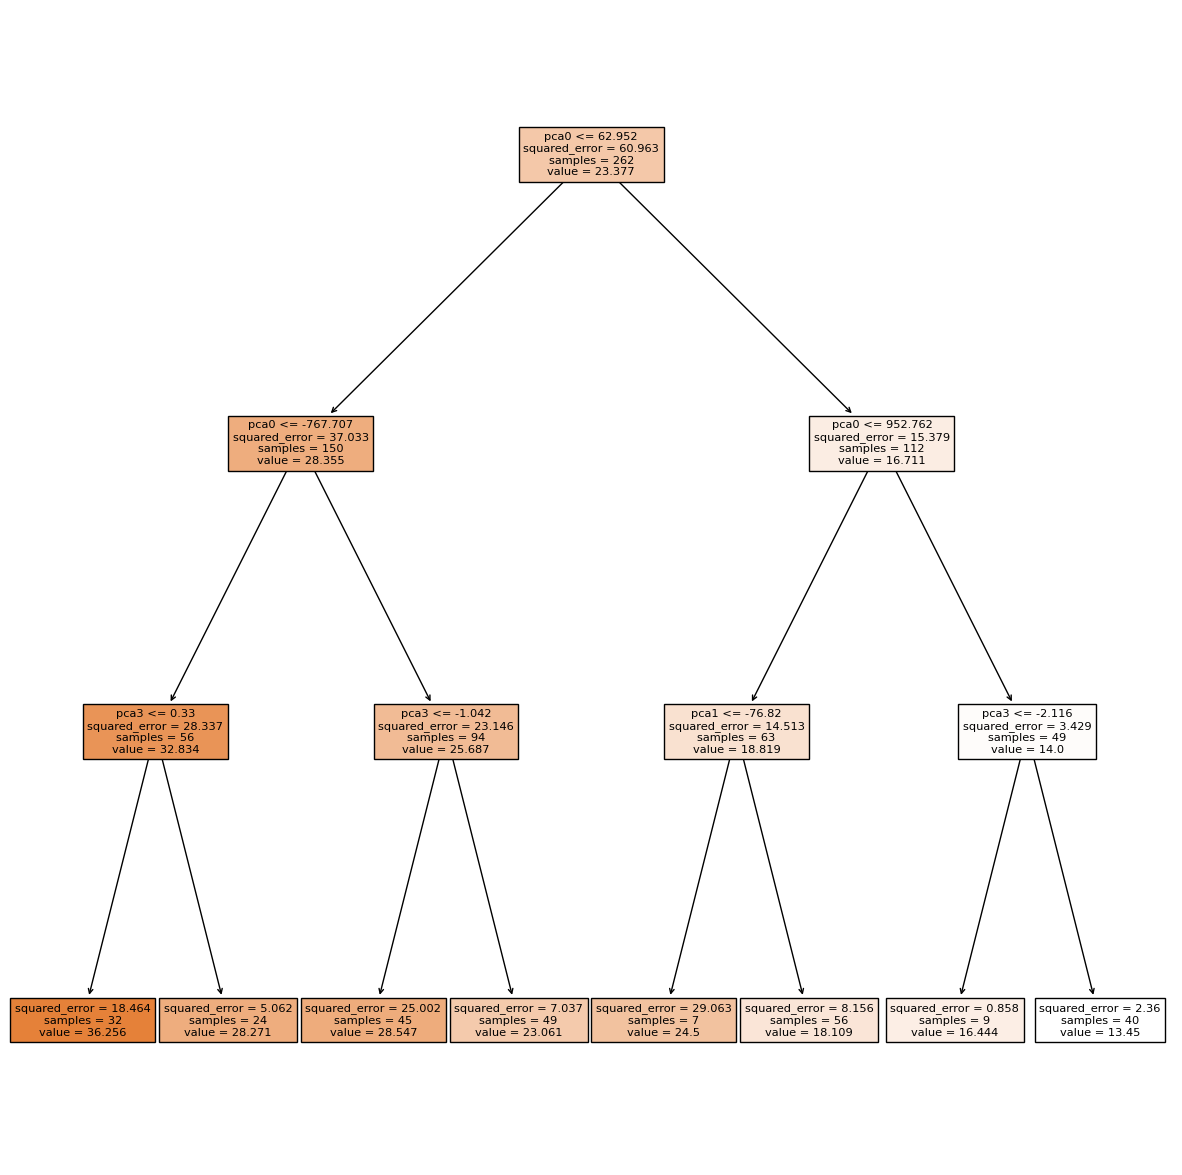

In [29]:
reg = DecisionTreeRegressor(max_depth=3,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(15, 15)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns_pca)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


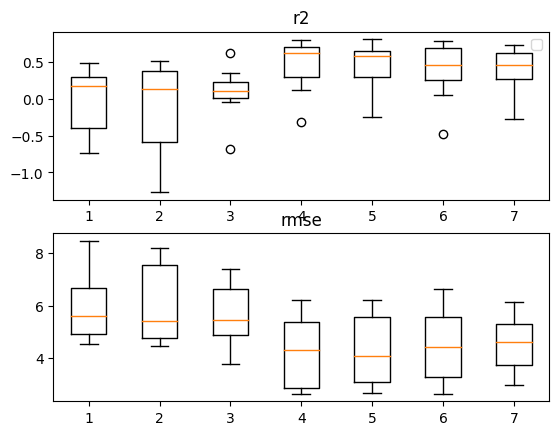

In [30]:
rmse = []
r2 = []

for com in range(1,8):
    pca=PCA(n_components=com,random_state=42)
    X = pca.fit_transform(X_0)
    columns_pca = pca.get_feature_names_out(columns)



    reg = DecisionTreeRegressor(random_state=42,splitter='best')
    cv = pd.DataFrame(cross_validate(reg,X,y,cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])

fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);
ax[0].legend();

# Maybe Partial Least Squares

In [164]:
from sklearn.cross_decomposition import PLSRegression

In [166]:
columns = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
X = df1[columns]
y = df1[["mpg"]]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Fit a PLS model on the training set
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

# Transform the training set and test set into new feature sets with reduced dimensions
X_train_pls = pls.transform(X_train)
X_test_pls = pls.transform(X_test)

X_train_pls

array([[ 8.63221403e-01,  5.57556127e-01],
       [-4.46745722e-01, -1.35267641e+00],
       [-2.21609474e+00, -1.18578312e+00],
       [-1.72461491e+00,  2.04022994e-01],
       [ 3.50570148e+00, -3.91890355e-01],
       [-1.55594633e+00, -8.97923681e-01],
       [ 3.99565604e+00, -2.71711372e-01],
       [ 3.31452171e-01,  1.15145513e-02],
       [ 3.28922954e+00,  3.49513317e-01],
       [ 1.86532188e-01,  1.06987543e+00],
       [-1.56717210e+00, -5.13414367e-01],
       [-2.79668903e+00,  5.18679991e-01],
       [ 2.86419432e+00,  6.49849692e-01],
       [-1.22171444e+00, -1.19820649e+00],
       [ 2.52826592e+00,  5.91553469e-01],
       [-1.19138136e+00, -3.57874364e-03],
       [-1.69094786e+00,  7.98100822e-01],
       [-1.68519381e+00, -1.10493168e+00],
       [-2.43748329e+00,  1.47045793e+00],
       [-1.55021345e+00, -6.37875696e-01],
       [-1.30685043e+00,  8.86524242e-01],
       [-1.14741762e+00,  9.66409536e-01],
       [ 7.91076607e-02, -1.01751746e+00],
       [-1.

In [ ]:
# Train a new model (e.g., linear regression) on the reduced feature set of the training set
lr = LinearRegression()
lr.fit(X_train_pls, y_train)

# Evaluate the performance of the new model on the reduced feature set of the test set
y_pred = lr.predict(X_test_pls)
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

highest r2: 0.8369033650922505
lowest mse: 9.83986598003327


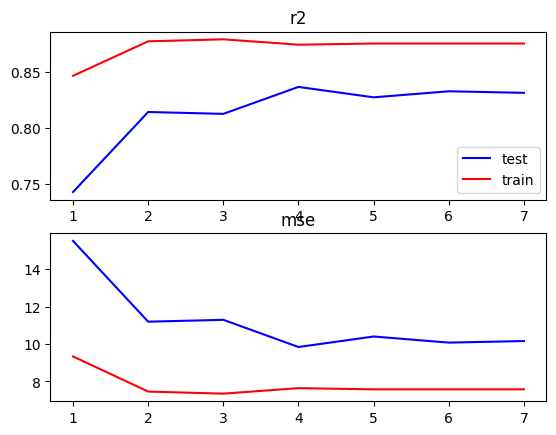

In [173]:
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []


for com in range(1,8):
    pls = PLSRegression(n_components=com)
    pls.fit(X_train, y_train)

    # Transform the training set and test set into new feature sets with reduced dimensions
    X_train_pls = pls.transform(X_train)
    X_test_pls = pls.transform(X_test)
    
    reg = DecisionTreeRegressor(max_depth= 4,random_state=42)
    reg.fit(X_train_pls,y_train)
    
    y_test_pred = reg.predict(X_test_pls)
    y_train_pred= reg.predict(X_train_pls)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"components":range(1,8)})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["components"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["components"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["components"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["components"],results["train_mse"],label="train",color='red');
ax[0].legend();
print("highest r2:",results["test_r2"].max())
print("lowest mse:",results["test_mse"].min())

r2:  0.8369033650922505
mse: 9.83986598003327


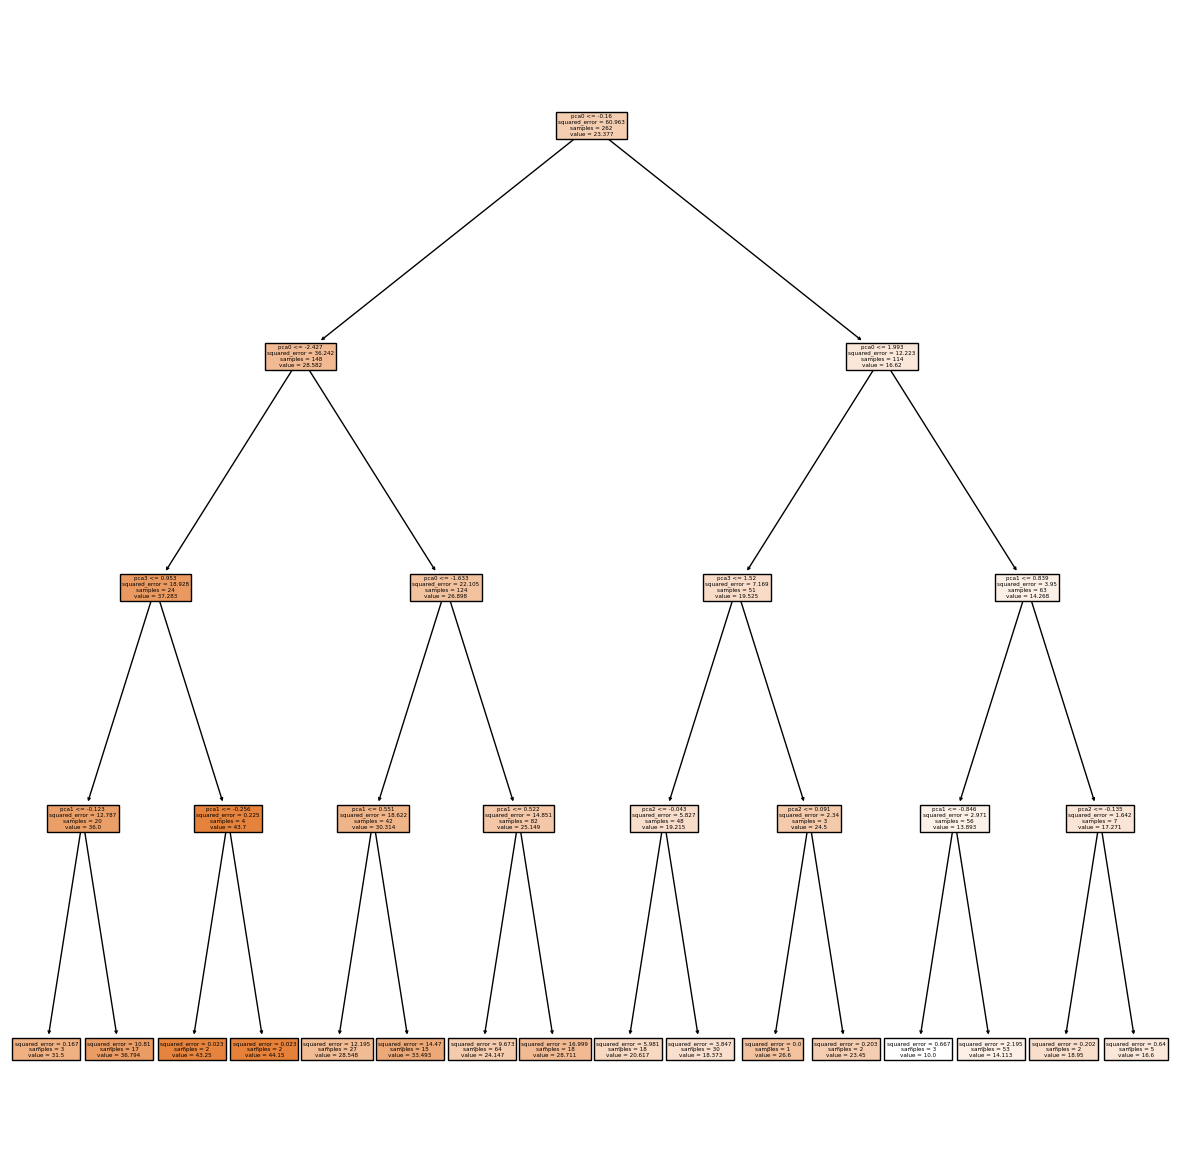

In [175]:
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)

# Transform the training set and test set into new feature sets with reduced dimensions
X_train_pls = pls.transform(X_train)
X_test_pls = pls.transform(X_test)

reg = DecisionTreeRegressor(max_depth= 4,random_state=42)
reg.fit(X_train_pls,y_train)

y_test_pred = reg.predict(X_test_pls)
y_train_pred= reg.predict(X_train_pls)

train_r2 =(r2_score(y_train, y_train_pred))
test_r2 =(r2_score(y_test, y_test_pred))

train_mse =(mean_squared_error(y_train, y_train_pred))
test_mse =(mean_squared_error(y_test, y_test_pred))

print("r2: ",test_r2)
print("mse:",test_mse)

plt.figure(figsize=(15, 15)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=columns_pca)
plt.show()

In [244]:
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

for com in range(1,8):
    reg = DecisionTreeRegressor(random_state=42)
    pls2 = PLSRegression(n_components=com)
    X_train,y_train = pls2.fit_transform(X_train,y_train)
    X_test,y_test = pls2.transform(X_test,y_test)
    
    reg.fit(X_train,y_train)
    
    y_test_pred = reg.predict(X_test)
    y_train_pred= reg.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"depth":depths})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["depth"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["depth"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["depth"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["depth"],results["train_mse"],label="train",color='red');
ax[0].legend()

ValueError: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.

In [239]:
pls2 = PLSRegression(n_components=3)
lol,lal= pls2.fit_transform(X_0,y)
lol

array([[ 2.68475093, -0.43702123, -0.80616806],
       [ 3.39141472, -0.25364306, -0.71551321],
       [ 2.9976777 , -0.16583702, -0.94171935],
       ...,
       [-1.16840625,  1.97424774, -0.39113762],
       [-1.69398619,  0.51102267,  0.49848442],
       [-1.68132444,  0.33903825,  0.66435105]])

In [230]:
y_new[0]

array([ 0.90683482, -0.61912739,  0.52533143, -0.2876912 ])

In [233]:
X[0]

array([ 2.68475093, -0.43702123, -0.80616806,  0.1493152 ])

In [65]:
df1.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name         object
dtype: object

In [187]:
X

(array([[ 2.68475093e+00, -4.37021233e-01],
        [ 3.39141472e+00, -2.53643056e-01],
        [ 2.99767770e+00, -1.65837019e-01],
        [ 2.85417997e+00, -3.74072914e-01],
        [ 2.86951237e+00, -1.14954730e-01],
        [ 4.55433348e+00,  4.45078156e-02],
        [ 4.99088675e+00,  3.16246575e-01],
        [ 4.89674415e+00,  3.95250828e-01],
        [ 5.00443480e+00,  1.18740440e-01],
        [ 4.16704977e+00,  3.92802640e-01],
        [ 3.64016544e+00,  1.17941278e-01],
        [ 3.54175453e+00,  4.19745157e-01],
        [ 3.63856188e+00,  1.35797569e-01],
        [ 4.29158533e+00,  4.52025467e-01],
        [-1.11693145e+00, -1.13702137e+00],
        [ 7.00052720e-01, -1.28964908e+00],
        [ 6.94800060e-01, -1.26896437e+00],
        [ 4.25878354e-01, -1.34705715e+00],
        [-1.34788690e+00, -1.01536725e+00],
        [-2.08543954e+00, -2.28927730e+00],
        [-8.84848447e-01, -1.80371527e+00],
        [-7.43139193e-01, -1.16017366e+00],
        [-9.80139108e-01, -1.717

### one-hot encoding origin

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
df2 = df1[columns]

def func(x):
    return origin_l[int(x)-1]

origin_l = ['american','euro','japanese']
df2['origin'] = df2['origin'].map(func)

df2

/tmp/ipykernel_1982/498303602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['origin'] = df2['origin'].map(func)


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,american
1,8.0,350.0,165.0,3693.0,11.5,70.0,american
2,8.0,318.0,150.0,3436.0,11.0,70.0,american
3,8.0,304.0,150.0,3433.0,12.0,70.0,american
4,8.0,302.0,140.0,3449.0,10.5,70.0,american
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,american
402,4.0,97.0,52.0,2130.0,24.6,82.0,euro
403,4.0,135.0,84.0,2295.0,11.6,82.0,american
404,4.0,120.0,79.0,2625.0,18.6,82.0,american


In [125]:
pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out())

,x0_american,x0_euro,x0_japanese
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
387,1.0,0.0,0.0
388,0.0,1.0,0.0
389,1.0,0.0,0.0
390,1.0,0.0,0.0


In [157]:
test = df2["origin"].values.reshape(-1, 1)
ohe = OneHotEncoder()
encoded_data= ohe.fit_transform(test)
encoded_data

<392x3 sparse matrix of type '<class 'numpy.float64'>'
	with 392 stored elements in Compressed Sparse Row format>

In [158]:
df2

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,american
1,8.0,350.0,165.0,3693.0,11.5,70.0,american
2,8.0,318.0,150.0,3436.0,11.0,70.0,american
3,8.0,304.0,150.0,3433.0,12.0,70.0,american
4,8.0,302.0,140.0,3449.0,10.5,70.0,american
...,...,...,...,...,...,...,...
387,4.0,140.0,86.0,2790.0,15.6,82.0,american
388,4.0,97.0,52.0,2130.0,24.6,82.0,euro
389,4.0,135.0,84.0,2295.0,11.6,82.0,american
390,4.0,120.0,79.0,2625.0,18.6,82.0,american


In [159]:
df3 =pd.concat([df2.reset_index(drop=True, inplace=False),pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out()).reset_index(drop=True, inplace=False)], axis = 1)
df3
df3

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,x0_american,x0_euro,x0_japanese
0,8.0,307.0,130.0,3504.0,12.0,70.0,american,1.0,0.0,0.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,american,1.0,0.0,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,american,1.0,0.0,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,american,1.0,0.0,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,american,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387,4.0,140.0,86.0,2790.0,15.6,82.0,american,1.0,0.0,0.0
388,4.0,97.0,52.0,2130.0,24.6,82.0,euro,0.0,1.0,0.0
389,4.0,135.0,84.0,2295.0,11.6,82.0,american,1.0,0.0,0.0
390,4.0,120.0,79.0,2625.0,18.6,82.0,american,1.0,0.0,0.0


In [160]:
X = df3[columns+["x0_american","x0_euro","x0_japanese"]].drop('origin',axis=1,inplace=False)
y = df1[["mpg"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
401,27.0
402,44.0
403,32.0
404,28.0


mse test: 9.480280492705857
r2 test: 0.8313667648139613
mse train: 6.03766700369417
r2 train: 0.8900741725325371


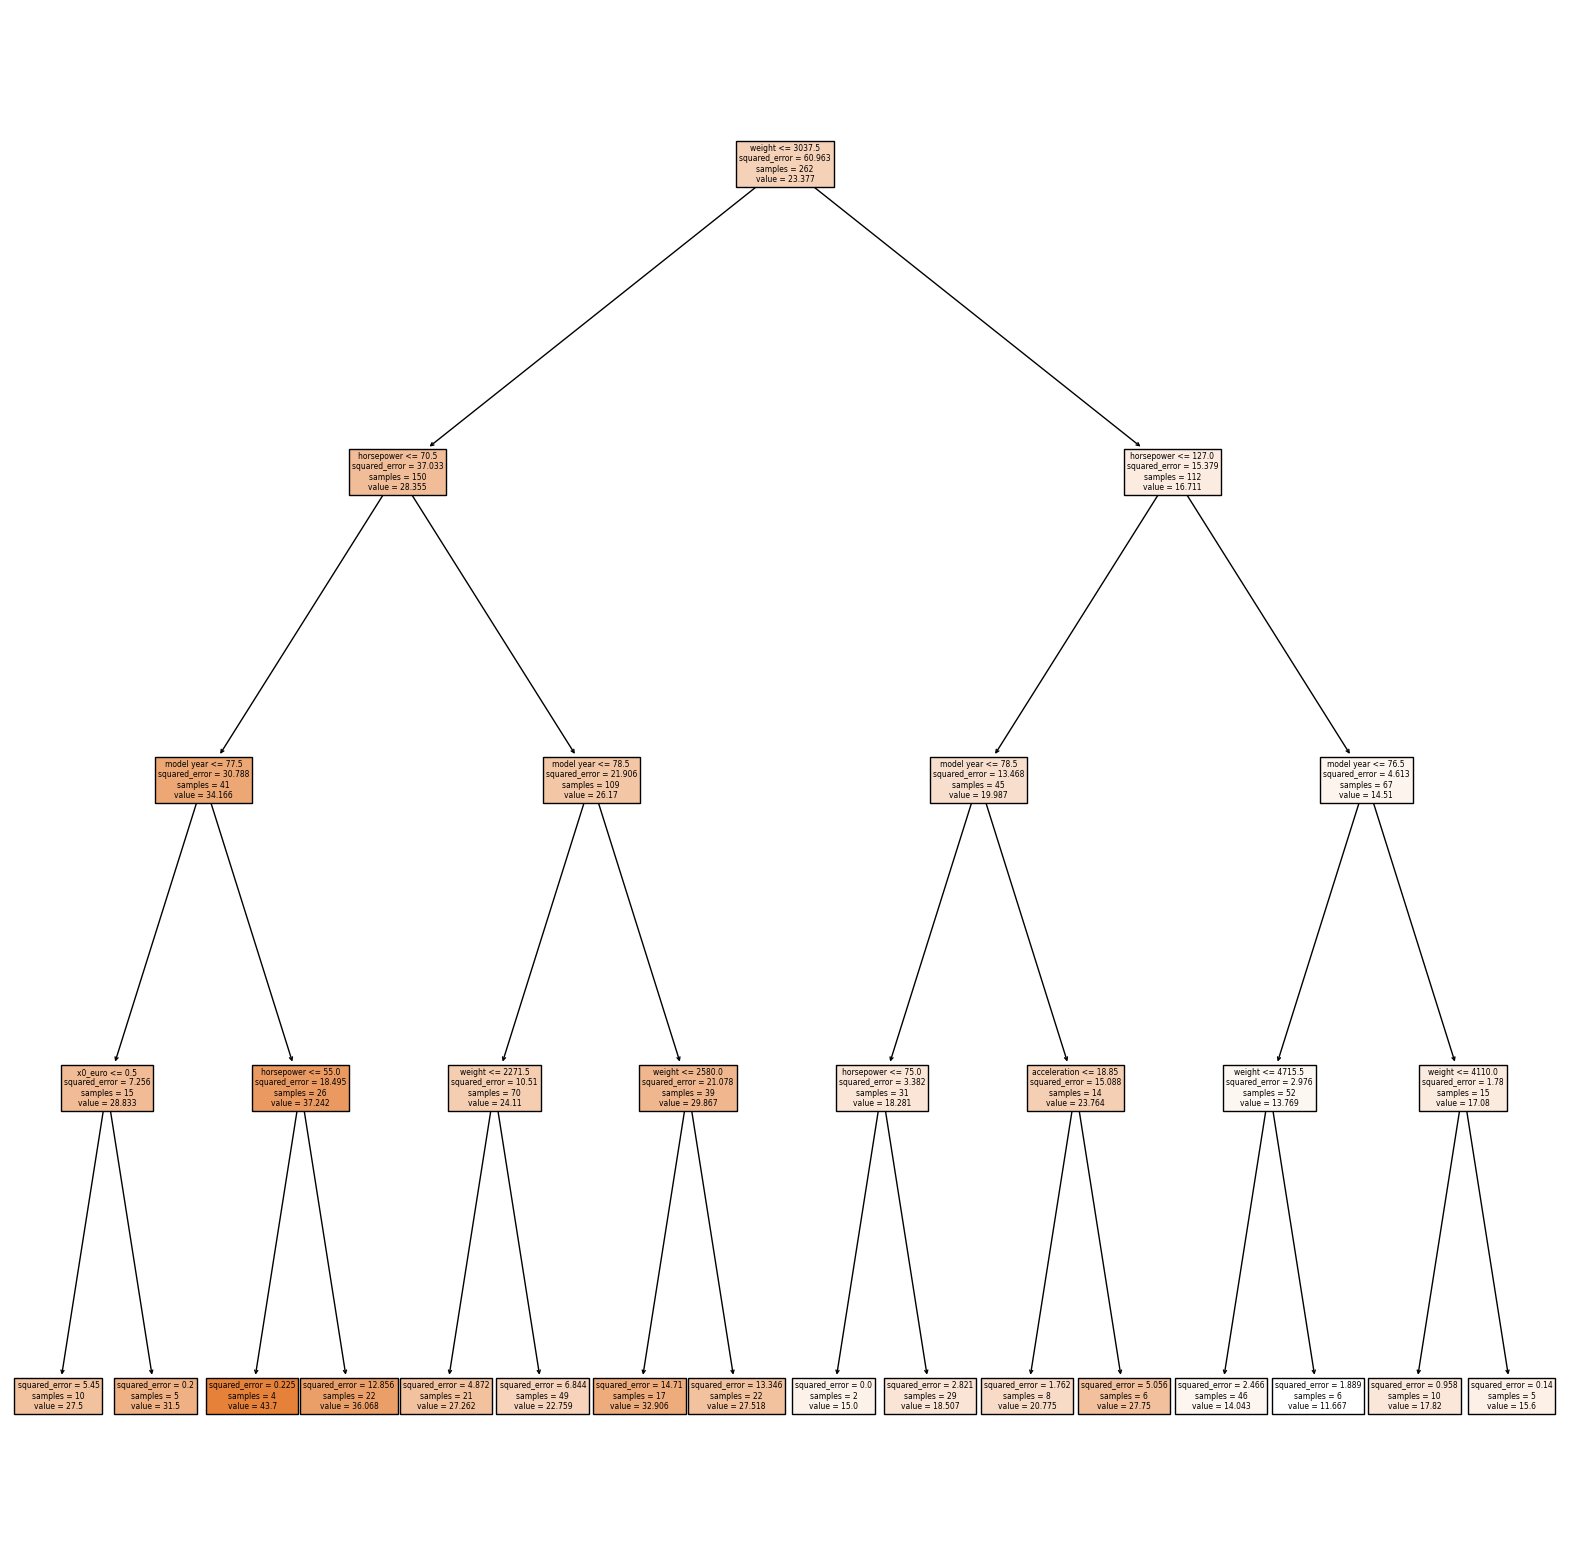

In [163]:
reg = DecisionTreeRegressor(max_depth= 4,random_state=42)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train =reg.predict(X_train)

print("mse test:",mean_squared_error(y_pred_test,y_test))
print("r2 test:",r2_score(y_pred_test,y_test))

print("mse train:",mean_squared_error(y_pred_train,y_train))
print("r2 train:",r2_score(y_pred_train,y_train))
plt.figure(figsize=(20, 20)) # Resize figure
tree.plot_tree(reg, filled=True,feature_names=df3.columns)
plt.show()

In [155]:
X

In [94]:
data = {'numerical_col': [1, 2, 3, 2, 1, 3]}
df = pd.DataFrame(data)

# instantiate the OneHotEncoder
encoder = OneHotEncoder()

# fit and transform the dataframe
encoded_data = encoder.fit_transform(df)

In [95]:
df

,numerical_col
0,1
1,2
2,3
3,2
4,1
5,3


In [98]:
encoded_data.todense()

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])

### Trying Boosting

In [6]:
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [10]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

r2_score(y_test,y_test_pred)


/home/rick/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8922703368999325

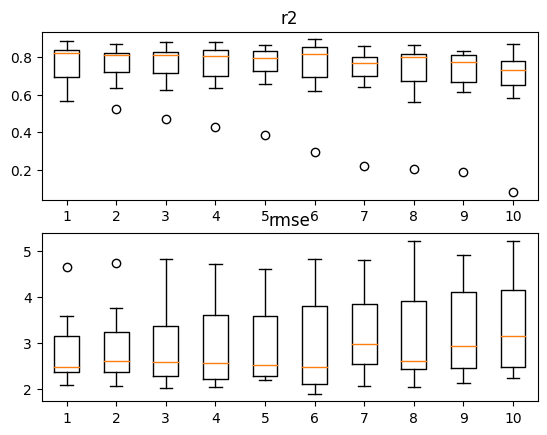

In [18]:
rmse = []
r2 = []
#y = column_or_1d(y, warn=True)

for lr in np.linspace(0.05,0.7,10):
    reg = GradientBoostingRegressor(learning_rate=lr,random_state=0)
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2);
ax[1].set_title("rmse")
ax[1].boxplot(rmse);


max r2:   0.8846251665499281
min rmse: 2.053962898944983


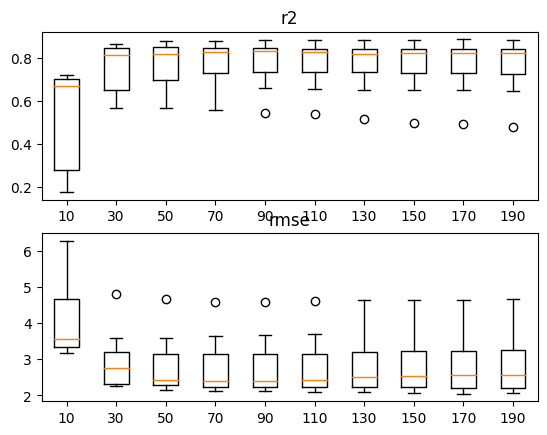

In [33]:
rmse = []
r2 = []

estimators = range(10,200,20)
for n_est in estimators:
    reg = GradientBoostingRegressor(n_estimators=n_est,random_state=0)
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=estimators);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=estimators);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())


In [ ]:
rmse = []
r2 = []

estimators = range(10,200,20)
for n_est in estimators:
    reg = GradientBoostingRegressor(n_estimators=n_est,random_state=0)
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=estimators);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=estimators);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())


### Bootstrap bagging

In [45]:
from sklearn.ensemble import BaggingRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

regr = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth= 4,random_state=42),
                        n_estimators=50, random_state=0).fit(X_train, y_train)
y_test_pred =regr.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8807681320277878


/home/rick/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:510: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max r2:   0.8991710560240297
min rmse: 1.953993974126251


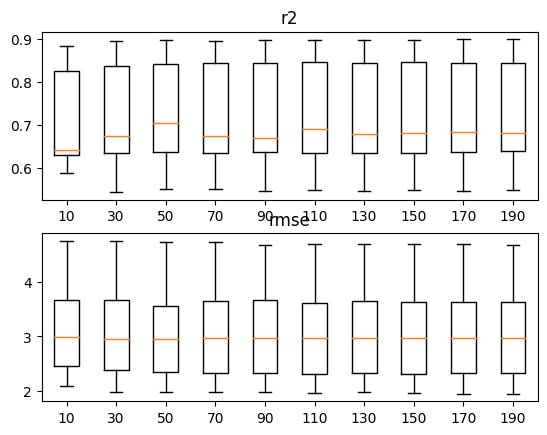

In [46]:
rmse = []
r2 = []

estimators = range(10,200,20)
for n_est in estimators:
    reg =BaggingRegressor(estimator=DecisionTreeRegressor(max_depth= 4,random_state=42),
                        n_estimators=n_est, random_state=0)
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=estimators);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=estimators);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())

In [47]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

max r2:   0.9115748823673063
min rmse: 1.8298624021259868


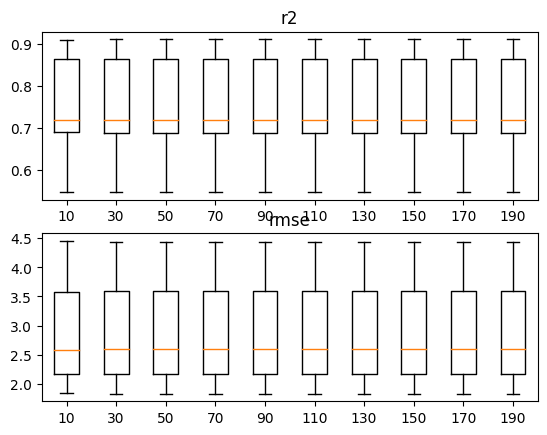

In [50]:
rmse = []
r2 = []

deps = range(10,200,20)
for dep in deps:
    reg = RandomForestRegressor(max_depth=dep, random_state=0)
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=deps);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=deps);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())

max r2:   0.8991652868279248
min rmse: 1.9540498748068051


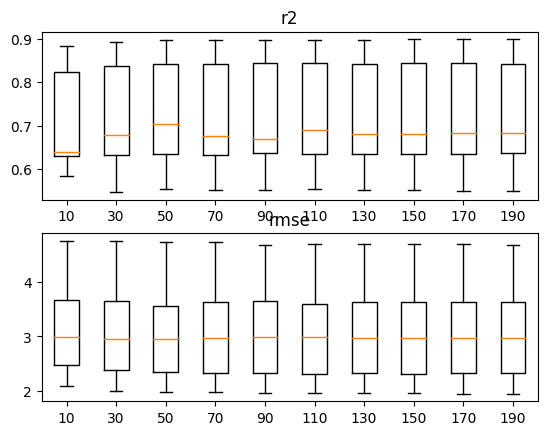

In [52]:
rmse = []
r2 = []

estimators = range(10,200,20)
for est in estimators:
    reg = RandomForestRegressor(n_estimators = est,max_depth=4, random_state=0)
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=estimators);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=estimators);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())

max r2:   0.896894836550889
min rmse: 1.9759266478249202


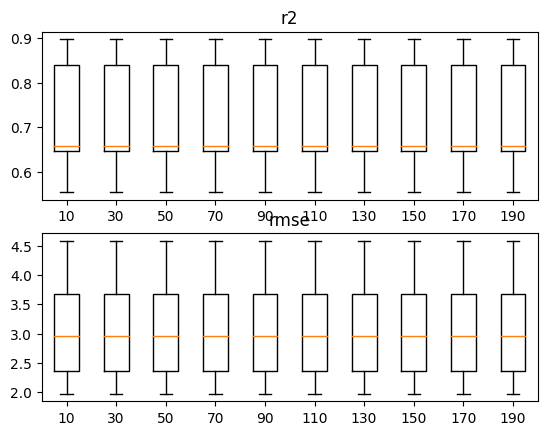

In [59]:
rmse = []
r2 = []

estimators = range(10,200,20)
for est in estimators:
    reg = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 50,max_depth=4, random_state=0))
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=estimators);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=estimators);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())

In [65]:
reg = RandomForestRegressor(n_estimators = 50,max_depth=4, random_state=0)
reg.fit(X_train,y_train)

pd.DataFrame({"feature":reg.feature_names_in_,"importance":reg.feature_importances_})


/tmp/ipykernel_2170/172494809.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


,feature,importance
0,cylinders,0.061739
1,displacement,0.213423
2,horsepower,0.191429
3,weight,0.373825
4,acceleration,0.008206
5,model year,0.149710
6,origin,0.001670


In [66]:
reg = RandomForestRegressor(n_estimators = 50,max_depth=4, random_state=0)
reg.fit(X,y)

pd.DataFrame({"feature":reg.feature_names_in_,"importance":reg.feature_importances_})


/tmp/ipykernel_2170/1320624819.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X,y)


,feature,importance
0,cylinders,0.200152
1,displacement,0.355797
2,horsepower,0.120350
3,weight,0.197752
4,acceleration,0.007906
5,model year,0.115746
6,origin,0.002298


### Support Vector Regression

In [53]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

max r2:   0.895788094591789
min rmse: 1.875265344993124


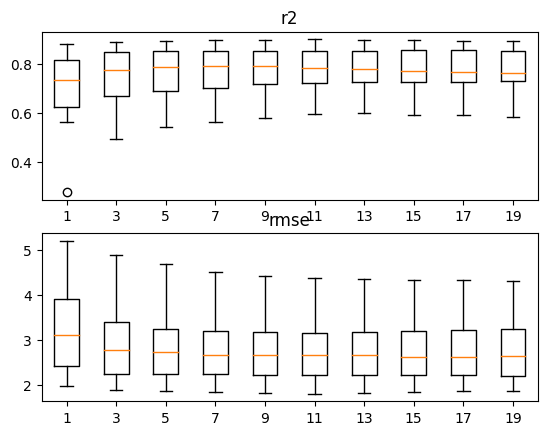

In [54]:
rmse = []
r2 = []

Cs = range(1,20,2)
for c in Cs:
    reg = make_pipeline(StandardScaler(), SVR(C=c, epsilon=0.2))
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=Cs);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=Cs);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())


max r2:   0.891764703840597
min rmse: 1.9111224514617262


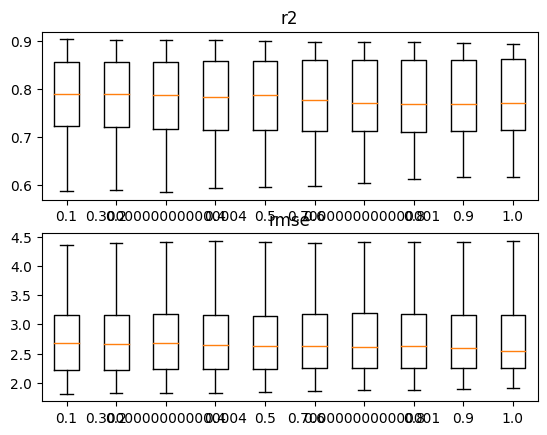

In [56]:
rmse = []
r2 = []

epsilon = np.linspace(0.1,1.0,10)
for eps in epsilon:
    reg = make_pipeline(StandardScaler(), SVR(C=10, epsilon=eps))
    cv = pd.DataFrame(cross_validate(reg,X,y.values.ravel(),cv=7,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].boxplot(r2,labels=epsilon);
ax[1].set_title("rmse")
ax[1].boxplot(rmse,labels=epsilon);

print("max r2:  ",cv["test_r2"].max())
print("min rmse:",(-cv["test_neg_root_mean_squared_error"]).min())